### **RANDOM FOREST (BIAS-VARIANCE)**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.datasets import load_diabetes
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm, skew, ttest_ind, f_oneway
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC as SVR
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames :
        print(os.path.join(dirname, filename))
from sklearn.datasets import make_circles

**EXAMPLE 1**

In [13]:
np.random.seed(42)
x,y = make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [14]:
x.shape

(500, 2)

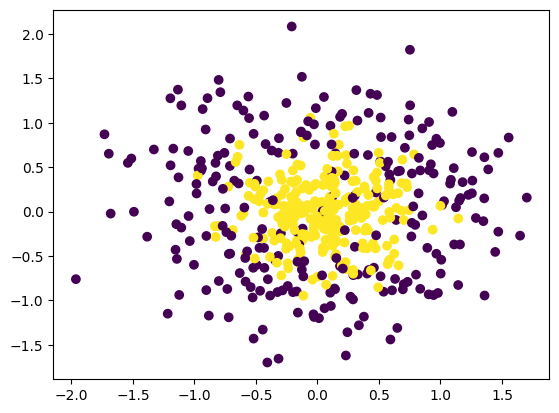

In [15]:
plt.scatter(x[:,0],x[:,1],c=y)

**USING DECISION TREE**

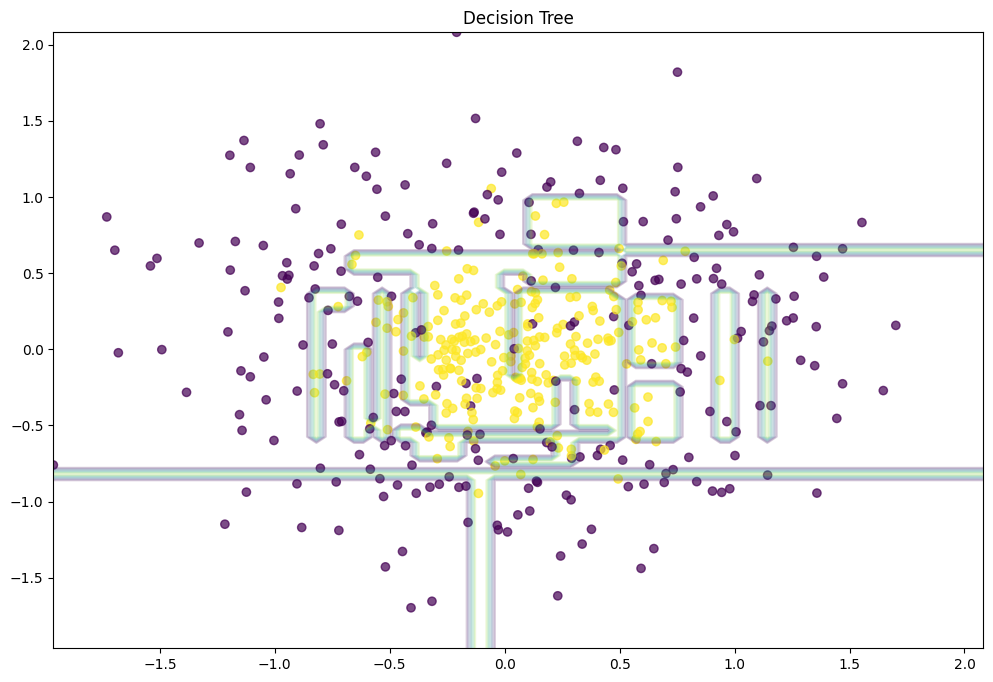

In [16]:
dtree= DecisionTreeClassifier()
dtree.fit(x_train,y_train)

plt.figure(figsize=(12,8))
x_range=np.linspace(x.min(),x.max(),100)
xx1,xx2 = np.meshgrid(x_range,x_range)
y_hat=dtree.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contour(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',alpha=.7)
plt.title('Decision Tree')
plt.show()

**USING RANDOM FOREST**

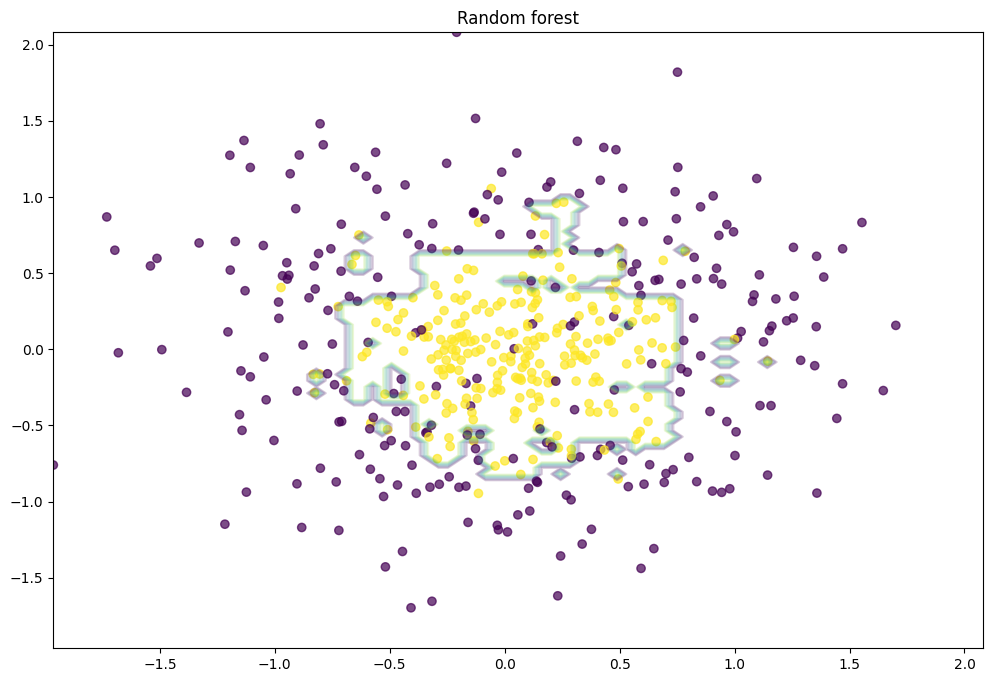

In [17]:
rf= RandomForestClassifier(n_estimators=500,random_state=42)
rf.fit(x_train,y_train)

plt.figure(figsize=(12,8))
x_range=np.linspace(x.min(),x.max(),100)
xx1,xx2 = np.meshgrid(x_range,x_range)
y_hat=rf.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contour(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',alpha=.7)
plt.title('Random forest')
plt.show()

**SECOND EXAMPLE WITH REGRESSION**

In [18]:
n_train = 150
n_test = 1000
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

(-5.0, 5.0)

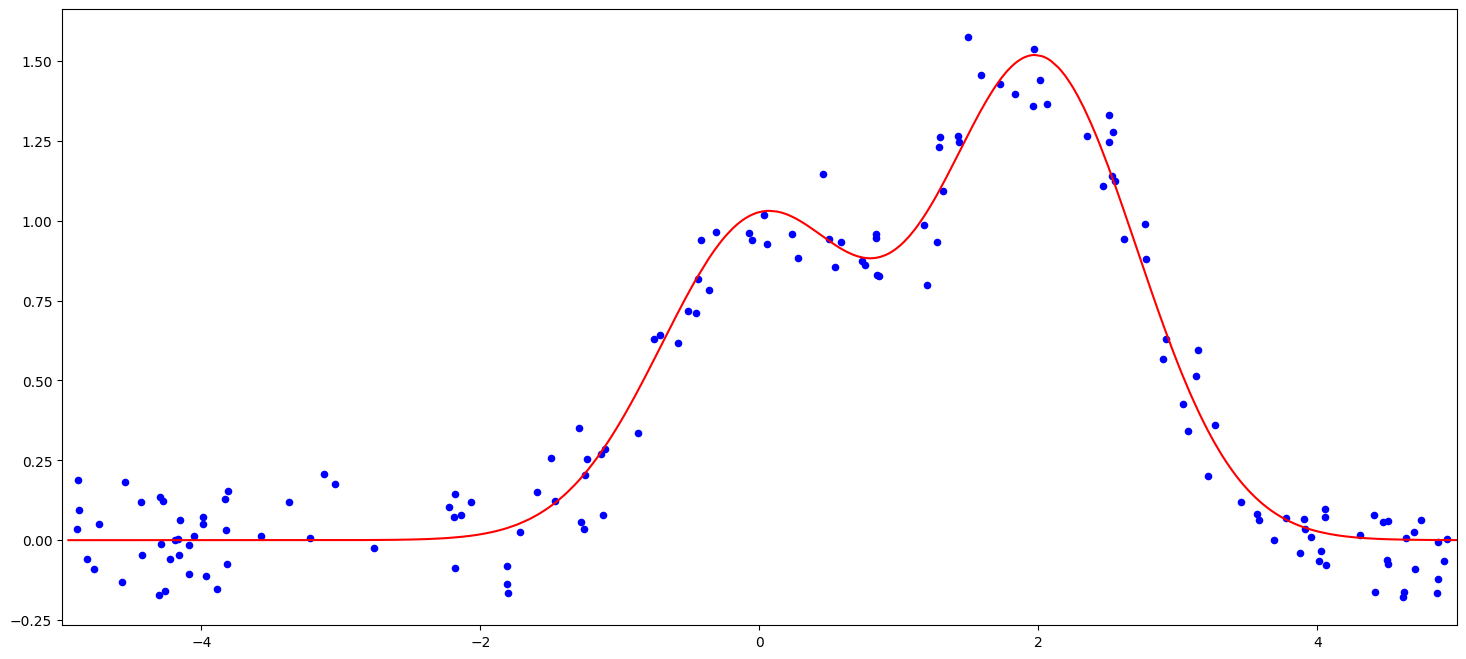

In [19]:
plt.figure(figsize=(18,8))
plt.plot(X_test,f(X_test),"r")
plt.scatter(X_train,y_train,c="b",s=20)
plt.xlim([-5,5])

**USING DECISION TREE REGRESSOR**

Text(0.5, 1.0, 'Decision Tree ,MSE = 19.27')

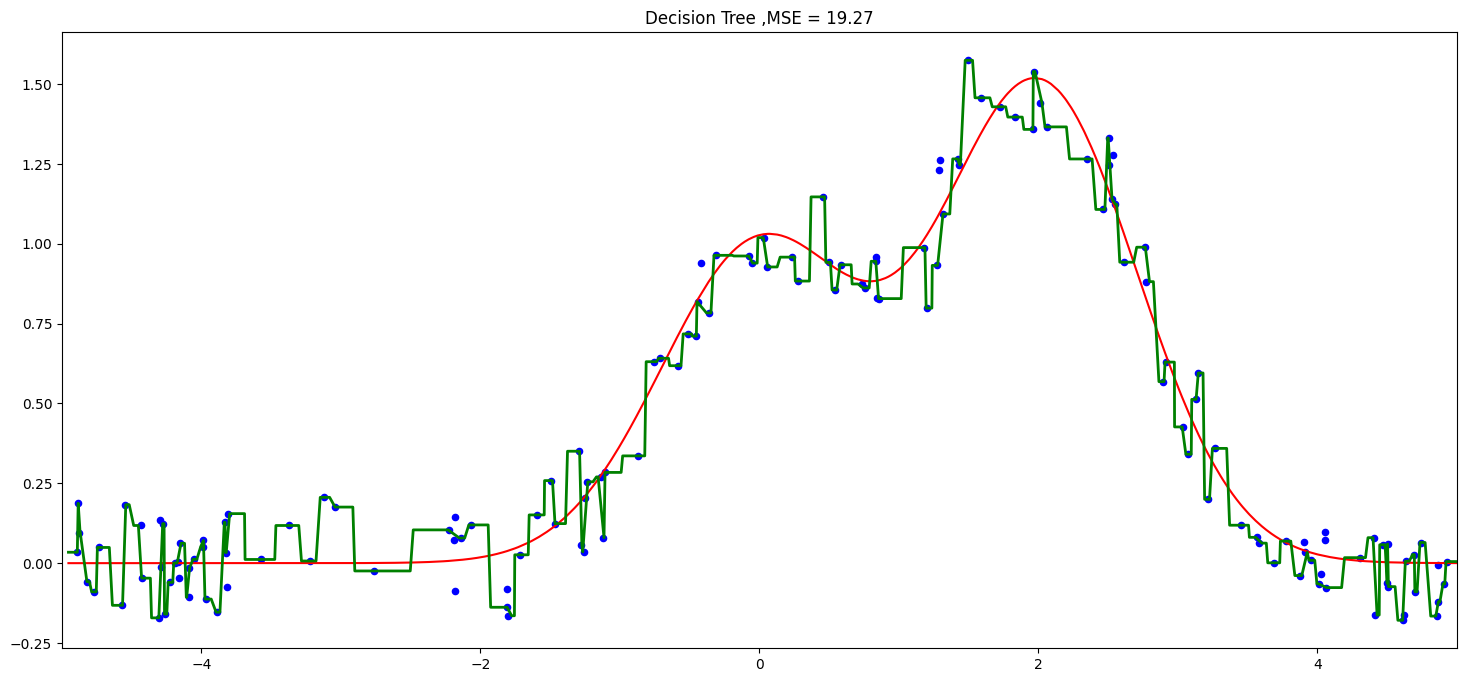

In [20]:
dtree= DecisionTreeRegressor().fit(X_train,y_train)
d_predict=dtree.predict(X_test)

plt.figure(figsize=(18,8))
plt.plot(X_test,f(X_test),"r")
plt.scatter(X_train,y_train,c="b",s=20)
plt.plot(X_test,d_predict,"g",lw=2)
plt.xlim([-5,5])
plt.title("Decision Tree ,MSE = %.2f"
          % np.sum((y_test-d_predict)** 2))

**USING RANDOM FOREST REGRESSOR**

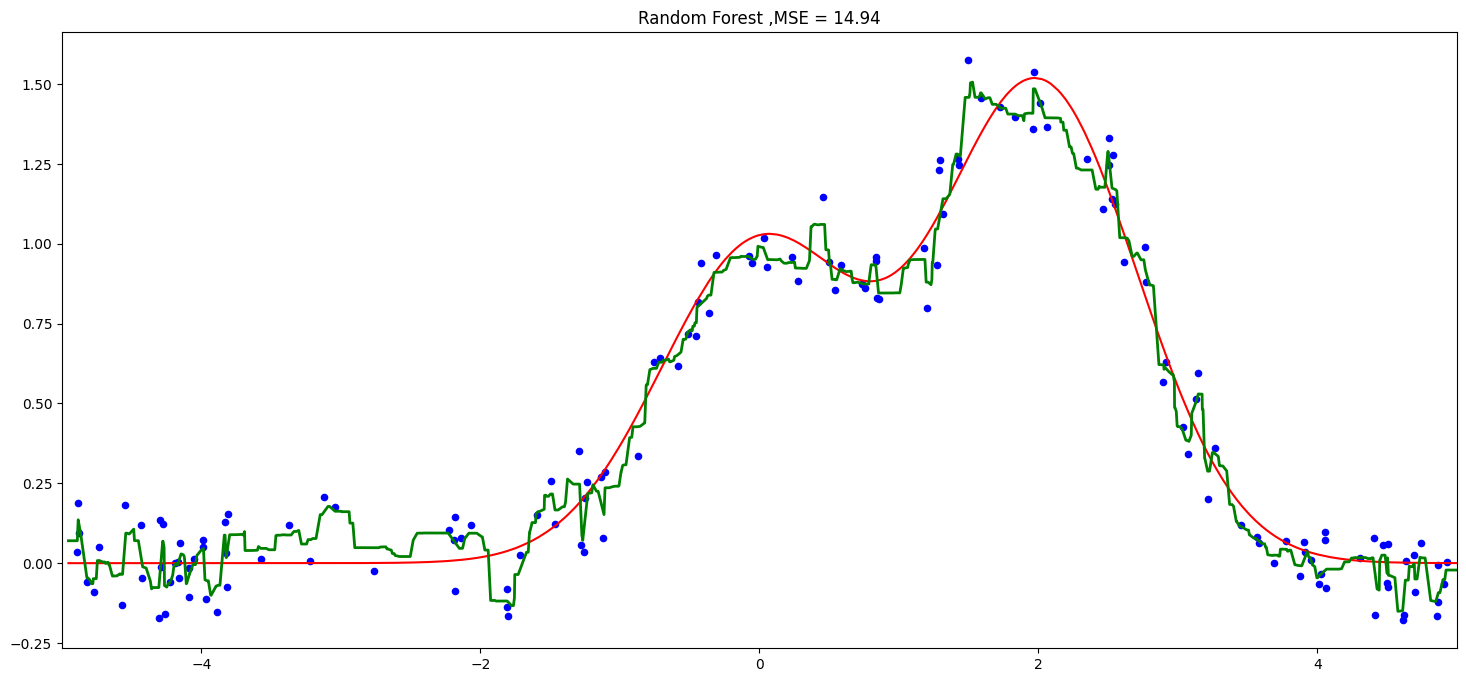

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor(n_estimators=1000).fit(X_train,y_train)
rfr_predict=rfr.predict(X_test)

plt.figure(figsize=(18,8))
plt.plot(X_test,f(X_test),"r")
plt.scatter(X_train,y_train,c="b",s=20)
plt.plot(X_test,rfr_predict,"g",lw=2)
plt.xlim([-5,5])
plt.title("Random Forest ,MSE = %.2f"
          % np.sum((y_test-rfr_predict)** 2));